In [313]:
from collections import Counter
import praw
import matplotlib.pyplot as plt
import numpy as np
from psaw import PushshiftAPI
import datetime as dt
import pandas as pd
from pandas import Series

# Initialize API wrapper

In [6]:
reddit = praw.Reddit(client_id='',
                      client_secret='',
                      user_agent='test')
print(reddit.read_only) 

api = PushshiftAPI(reddit)

True


# Grab data from subreddit

In [363]:
start_epoch = int(dt.datetime(2018, 11, 1).timestamp())
end_epoch = int(dt.datetime(2019, 3, 30).timestamp())

sub_psaw = list(api.search_submissions(before=end_epoch, after=start_epoch,
                            subreddit='kanye',
                            limit=40000))

#  User Activity

In [252]:
###  GET LIST OF USERS
user_counts = Counter()

for sub in sub_psaw:
    user_counts.update([str(sub.author)])
    comments = sub.comments
    comments.replace_more()
    comments = comments.list()
    for comment in comments:
        user_counts.update([str(comment.author)])

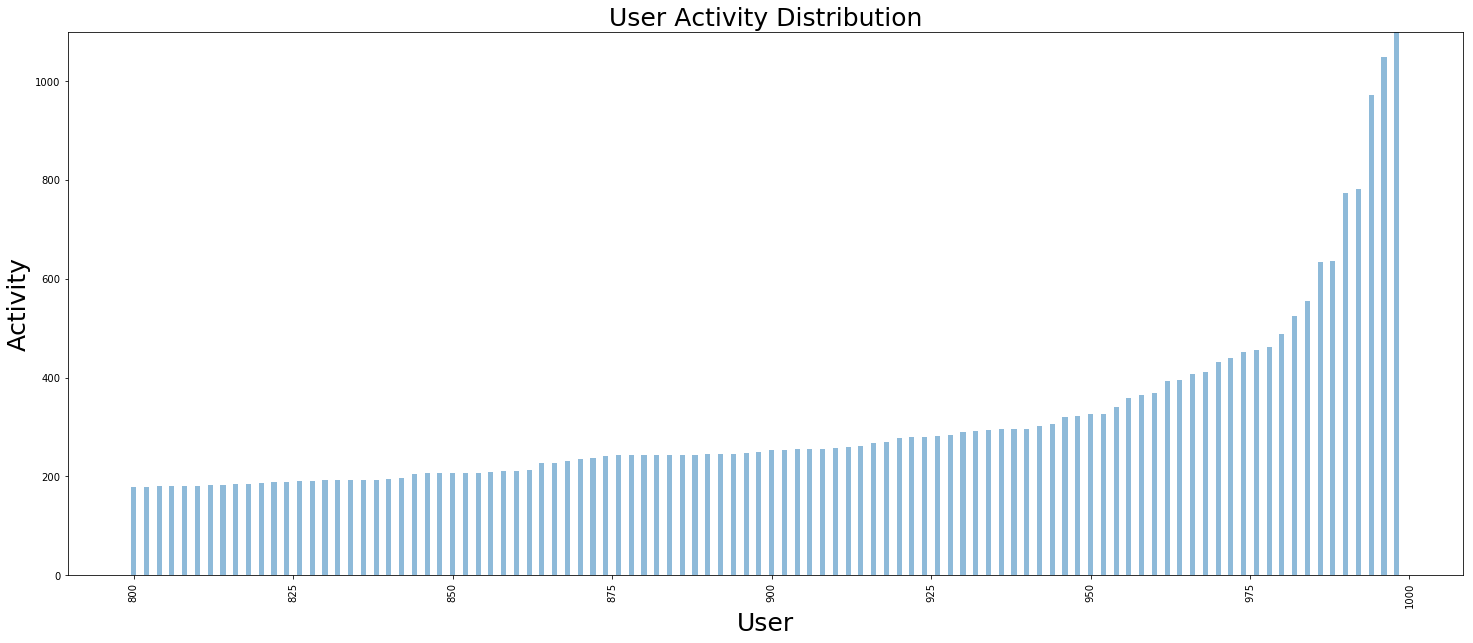

In [368]:
plt.figure(figsize=(25,10))
names, counts = zip(*user_counts.most_common(500))
x = np.flip(np.arange(0,1000,2))
plt.bar(x[:100], counts[:100], align='center', alpha=.5)
# plt.xticks(x[:100], names[:100])
plt.xticks(rotation=90)
plt.xlabel('User',fontsize=25)
plt.ylabel('Activity',fontsize=25)
plt.ylim(0,1100)
plt.title('User Activity Distribution',fontsize=25)
plt.show()
plt.close()

# What other communities does this community interact most with?

In [369]:
subreddits = Counter()
subred_app = Counter()
user_subreds = {}

for ind,user_count in enumerate(user_counts.most_common(100)):
    try:
        l = [
            str(comment.subreddit) 
            for comment in reddit.redditor(user_count[0])
            .comments.new(limit=1000)
        ]
        c = Counter(l)
        subreddits = subreddits + c
        subred_app = subred_app + Counter(list(set(l)))
        user_subreds[user_count[0]] = c
    except:
            pass
    

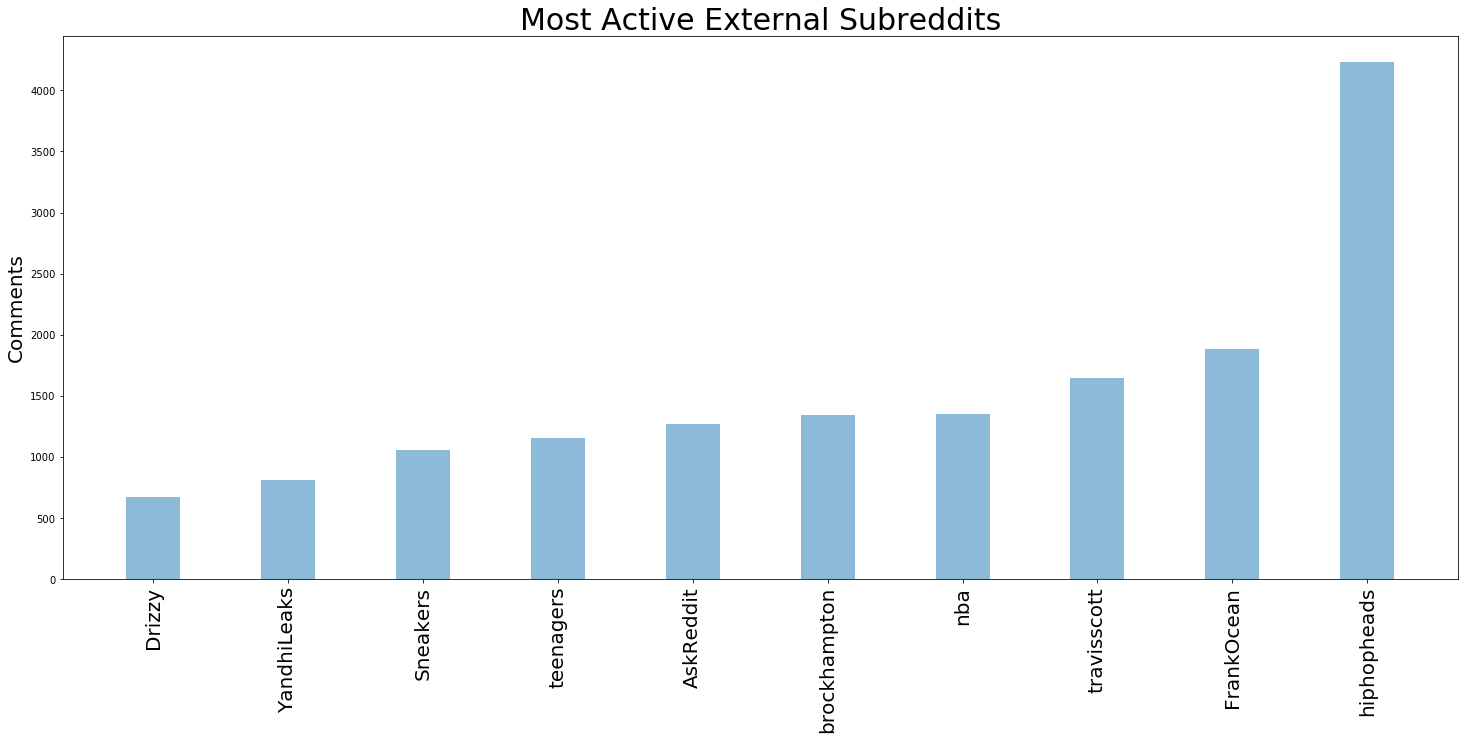

In [293]:
num = 11
plt.figure(figsize=(25,10))
names, counts = zip(*subreddits.most_common(num))
x = np.flip(np.arange(0,num*2,2))
plt.bar(x[1:num], counts[1:num], align='center', alpha=.5)
plt.xticks(x[1:num], names[1:num], fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Comments', fontsize=20)
# plt.ylim(0,1100)
plt.title('Most Active External Subreddits', fontsize=30)
plt.show()
plt.close()

c=Counter()
dict.update(c,user_count.most_common(10))
